# <a id="#">Task 4 – Edge detection: Derivative operators</a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io

---

## Prewitt filters

**<a id="#">Task 4.1.1.</a>** Load the image `data/lena.png` and show it:

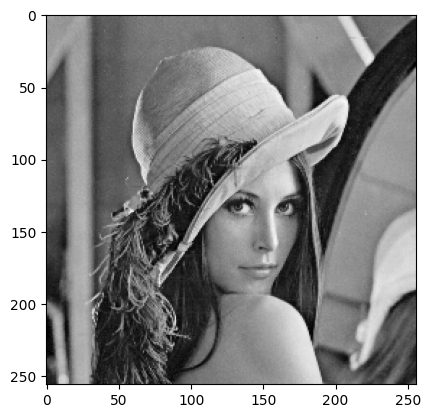

In [3]:
lena = plt.imread('data/lena.png')
plt.imshow(lena, 'gray')

**<a id="#">Task 4.1.2.</a>** Implement horizontal and vertical $3 \times 3$ Prewitt filters:

In [4]:
def prewitt_h(img):
    result = np.zeros(img.shape)
    n = 1
    operator = np.array([[-1/6, 0, 1/6],[-1/6, 0, 1/6],[-1/6, 0, 1/6]])
    for p in np.ndindex(img.shape):
        # leave the loop if the pixel is at the border (neighborhood outside image)
        if p[0] < n or p[1] < n or p[0] > img.shape[0] - 1 - n or p[1] > img.shape[0] - 1 - n:
            continue
        
        # compute the mean of the intensity values of the pixels in the neigborhood
        neighborhood = img[p[0]-n:p[0]+n+1, p[1]-n:p[1]+n+1]
        neighborhood = np.multiply(neighborhood, operator)
        value = neighborhood.sum()

        result[p] = value

    return result
    
def prewitt_v(img):
    result = np.zeros(img.shape)
    n = 1
    operator = np.array([[-1/6, -1/6, -1/6],[0, 0, 0],[1/6, 1/6, 1/6]])
    for p in np.ndindex(img.shape):
        # leave the loop if the pixel is at the border (neighborhood outside image)
        if p[0] < n or p[1] < n or p[0] > img.shape[0] - 1 - n or p[1] > img.shape[0] - 1 - n:
            continue
        
        # compute the mean of the intensity values of the pixels in the neigborhood
        neighborhood = img[p[0]-n:p[0]+n+1, p[1]-n:p[1]+n+1]
        neighborhood = np.multiply(neighborhood, operator)
        value = neighborhood.sum()

        result[p] = value

    return result

**<a id="#">Task 4.1.3.</a>** Test your above solution using the functions `prewitt_h` and `prewitt_v` for the previously loaded image and show the result:

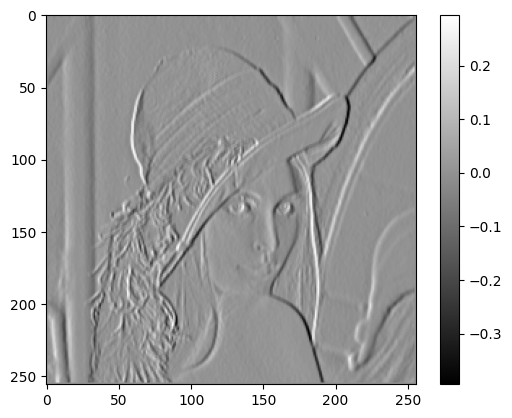

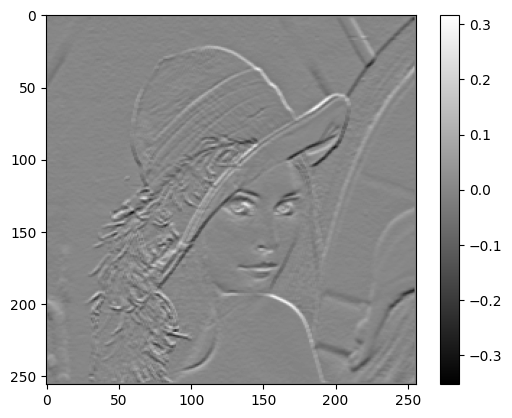

In [5]:
plt.imshow(prewitt_h(lena), 'gray')
plt.colorbar()
plt.figure()
plt.imshow(prewitt_v(lena), 'gray')
plt.colorbar()

**<a id="#">Task 4.1.4.</a>** Compare your results with the correct result image `data/lena_prewitt_h.tiff` and `data/lena_prewitt_v.tiff`:

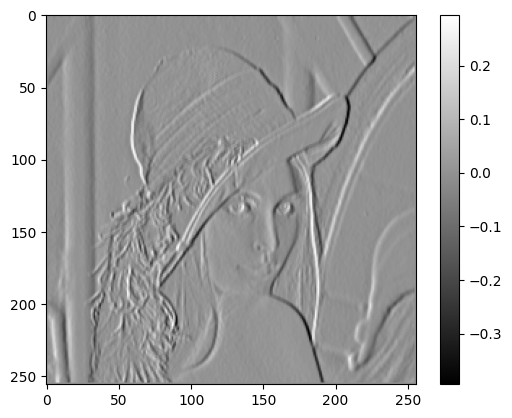

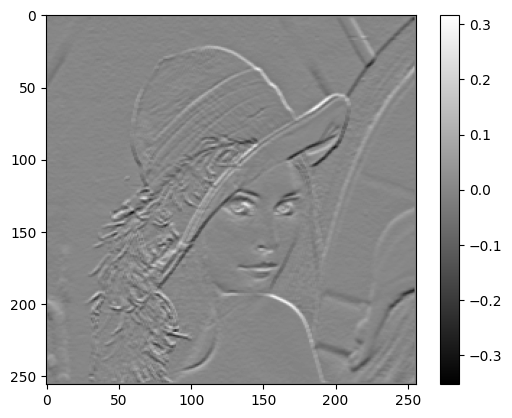

In [7]:
lena_prewitt_h = skimage.io.imread('data/lena_prewitt_h.tiff')
plt.imshow(lena_prewitt_h, 'gray')
plt.colorbar()
assert np.allclose(prewitt_h(lena), lena_prewitt_h, atol = 1/255)

plt.figure()
lena_prewitt_v = skimage.io.imread('data/lena_prewitt_v.tiff')
plt.imshow(lena_prewitt_v, 'gray')
plt.colorbar()
assert np.allclose(prewitt_v(lena), lena_prewitt_v, atol = 1/255)

---

## Edge detection

**<a id="#">Task 4.2.1.</a>** Use your results from **Task 4.1.2 – 4.1.3** to compute the *gradient magnitude* of the image:

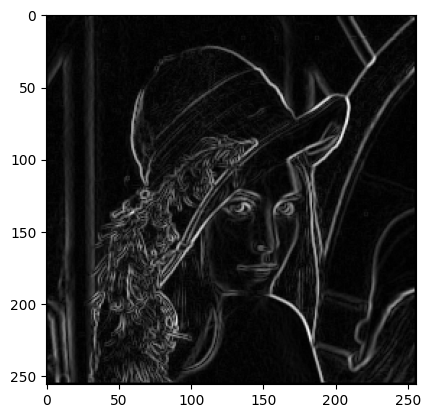

In [9]:
grad_mag = np.sqrt(prewitt_h(lena) ** 2 + prewitt_v(lena) ** 2)

plt.imshow(grad_mag, 'gray')

**<a id="#">Task 4.2.2.</a>** Compare your result with the correct result image `data/lena_prewitt_gradmag.tiff`:

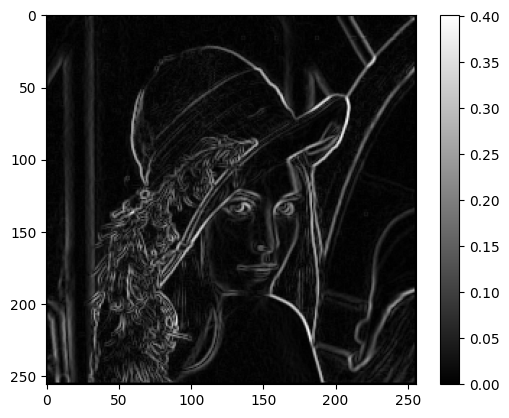

In [10]:
lena_prewitt_gradmag = skimage.io.imread('data/lena_prewitt_gradmag.tiff')
plt.imshow(lena_prewitt_gradmag, 'gray')
plt.colorbar()
assert np.allclose(grad_mag, lena_prewitt_gradmag, atol = 1/255)

---

## Sobel filters (bonus)

**<a id="#">Task 4.3.1.</a>** Implement the two functions `sobel_h` and `sobel_v` for horizontal and vertical $3 \times 3$ Sobel filtering, respectively:

In [11]:
def sobel_h(img):
    result = np.zeros(img.shape)
    n = 1
    operator = np.array([[-1/8, 0, 1/8],[-2/8, 0, 2/8],[-1/8, 0, 1/8]])
    for p in np.ndindex(img.shape):
        # leave the loop if the pixel is at the border (neighborhood outside image)
        if p[0] < n or p[1] < n or p[0] > img.shape[0] - 1 - n or p[1] > img.shape[0] - 1 - n:
            continue
        
        # compute the mean of the intensity values of the pixels in the neigborhood
        neighborhood = img[p[0]-n:p[0]+n+1, p[1]-n:p[1]+n+1]
        neighborhood = np.multiply(neighborhood, operator)
        value = neighborhood.sum()

        result[p] = value

    return result
    
def sobel_v(img):
    result = np.zeros(img.shape)
    n = 1
    operator = np.array([[-1/8, -2/8, -1/8],[0, 0, 0],[1/8, 2/8, 1/8]])
    for p in np.ndindex(img.shape):
        # leave the loop if the pixel is at the border (neighborhood outside image)
        if p[0] < n or p[1] < n or p[0] > img.shape[0] - 1 - n or p[1] > img.shape[0] - 1 - n:
            continue
        
        # compute the mean of the intensity values of the pixels in the neigborhood
        neighborhood = img[p[0]-n:p[0]+n+1, p[1]-n:p[1]+n+1]
        neighborhood = np.multiply(neighborhood, operator)
        value = neighborhood.sum()

        result[p] = value

    return result

**<a id="#">Task 4.3.2.</a>** Test your above solution using the functions `sobel_h` and `sobel_v` for the previously loaded image and show the result:

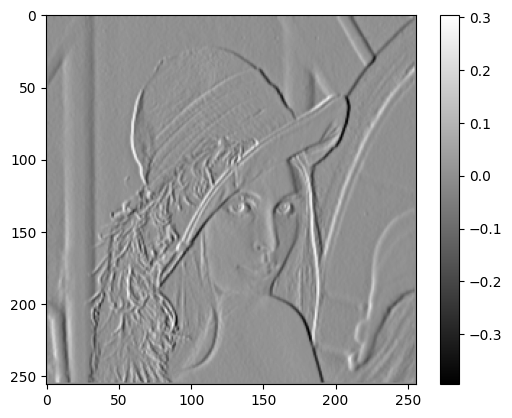

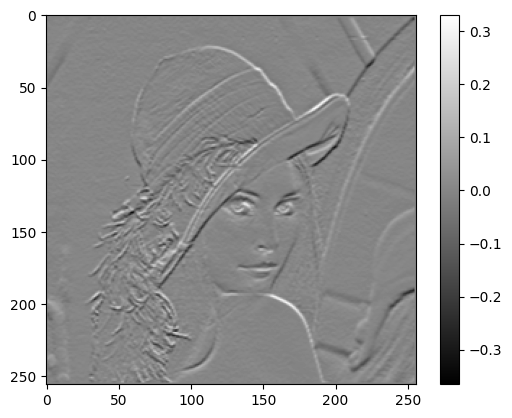

In [12]:
plt.imshow(sobel_h(lena), 'gray')
plt.colorbar()
plt.figure()
plt.imshow(sobel_v(lena), 'gray')
plt.colorbar()

**<a id="#">Task 4.3.3.</a>** Compare your results with the correct result image `data/lena_sobel_h.tiff` and `data/lena_sobel_v.tiff`:

In [13]:
lena_sobel_h = skimage.io.imread('data/lena_sobel_h.tiff')
lena_sobel_v = skimage.io.imread('data/lena_sobel_v.tiff')
assert np.allclose(sobel_h(lena), lena_sobel_h, atol = 1/255)
assert np.allclose(sobel_v(lena), lena_sobel_v, atol = 1/255)

### Extra

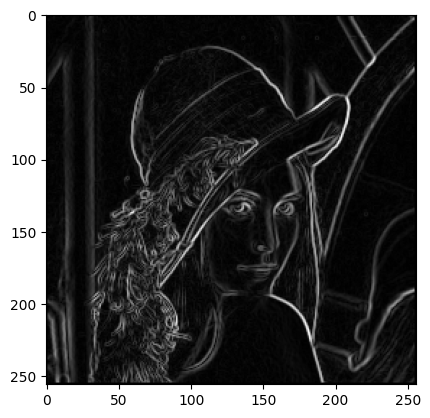

In [14]:
sobel_grad_mag = np.sqrt(sobel_h(lena) ** 2 + sobel_v(lena) ** 2)

plt.imshow(sobel_grad_mag, 'gray')